# Sediment Cascade in the Salish Sea

During springtime in British Columbia, Canada, warmer temperatures cause snow to melt in the high mountains. This snowmelt rushes downward into rivers, carrying with it a tremendous amount of suspended sediment. A strong boundary between the fresh, sediment-laden water and the denser, saltier sea water can be seen this time of year.

<img src="/ADCP Folder/blue_water_muddy_water.jpg" width="" align="" />

What's happening here? The sediment-laden water at right has just come from the Fraser River, which empties into the Strait of Georgia. Since it iis warmer, fresher and less dense than the sea water, it slides on top of the sea water creating a strong boundary. This is also known as the Freshwater Plume, riding on top of the Saltwater Wedge. The configuration is illustrated in the following diagram:

<img src="/ADCP Folder/salt_wedge.png" width="" align="" />

In this case study we are going to look at what happens to this sediment-laden water as it interacts with the tides in this area. We're going to use data from the Delta Dynamics Lab, which is situated at a depth of 101 m, just seaward from the mouth of the Fraser River. 

<img src="/ADCP Folder/Case_Study_3_Map.png" width="" align="" />

At the Delta Dynamics Lab, Ocean Networks Canada operates an Acoustic Doppler Current Profiler (ADCP) along with a Turbidity Meter (and many other instruments). An ADCP is an active acoustic instrument that uses beams of pulsed sound energy to gather information about the water column, including currents and backscatter. A turbidity meter measures the amount of sediment within the water. In the image below, you can see a photo of the Delta Dynamics Lab, with a blue and red ADCP on top, being lowered into the sea near the mouth of the Fraser River. The ADCP has 4 red transducer heads which generate 4 energy beams (only 2 are visible in the photo).

<img src="/ADCP Folder/ddl_deployment.jpg" width="" align="" />

## Import Libraries

In [2]:
# Import the liabraries
import json
import os
import matplotlib.pyplot as plt
import pandas as pd

from onc import ONC
onc = ONC('ENTER_YOUR_TOKEN_HERE'])                 # Enter your token here   

# Compare Turbidity vs. Tide Signatures

First, we are going to look at the pressure variations over time. These correspond to the tidal variations. We will compare this with measurements of turbidity to find the time in the tidal cycle when turbidity suddenly increased.

## Download pressure data from the ADCP and turbidity data from the Turbidity Meter

In [5]:
# Define the date range of the data
sTime='2022-06-12T00:00:00.000Z';  
eTime='2022-06-12T22:55:00.000Z';  

#Get pressure data from ADCP on the DDL platform during June 2022.
#Pressure is typically used as a diagnostic metric, but in this case we are using it to see the tidal cycle. 
dCode='RDIADCP300WH15551';                            # Define the device code for the ADCP 


parameters = {'deviceCode':dCode,                     # Define the device to use
            'dateFrom':sTime,                         # The datetime of the first (From) data point
            'dateTo':eTime,                           # The datetime of the last (To) data point
            'qualityControl':'clean',                 # Define quality control
            'resamplePeriod':'60'}                    # Define the resample period; Minute ensemble

response = onc.getScalardataByDevice(parameters)          # Make the request using the parameters

df_adcp = pd.DataFrame(response['sensorData'])        # Create a dataframe for the ADCP data


In [6]:
#Get turbidity data from the Turbitidy meter on the DDL platform during June 2022.
d1Code='WLNTUS372';                                   # Device code for the Turbidity Meter 
parameters = {'deviceCode':d1Code,                    # Define the device to use
            'dateFrom':sTime,                         # The datetime of the first (From) data point
            'dateTo':eTime,                           # The datetime of the last (To) data point
            'qualityControl':'clean',                 # Define quality control
            'resamplePeriod':'60'}                    # Define the resample period; Minute ensemble


response = onc.getScalardataByDevice(parameters)          # Make the request using the parameters

df_turb = pd.DataFrame(response['sensorData'])        # Create a dataframe for the turbidity data

# Inspect the 2 data frames

You can see that one of the sensor categories provided is Pressure. Later, we will plot this pressure data as a proxy for the tidal cycle.

In [6]:
df_adcp

,actualSamples,data,outputFormat,propertyCode,sensorCategoryCode,sensorCode,sensorName,unitOfMeasure
0,1375,"{'counts': [11, 11, 12, 11, 11, 11, 11, 11, 11...",array,magneticheading,magnetic_heading,magnetic_heading,Magnetic Compass Heading,deg
1,1375,"{'counts': [11, 11, 12, 11, 11, 11, 11, 11, 11...",array,pitch,pitch,pitch,Pitch,deg
2,1375,"{'counts': [11, 11, 12, 11, 11, 11, 11, 11, 11...",array,pressure,pressure,Pressure,Pressure,decibar
3,1375,"{'counts': [11, 11, 12, 11, 11, 11, 11, 11, 11...",array,roll,roll,roll,Roll,deg
4,1375,"{'counts': [11, 11, 12, 11, 11, 11, 11, 11, 11...",array,soundspeed,sound_speed,Sound_Speed,Sound Speed,m/s
5,1375,"{'counts': [11, 11, 12, 11, 11, 11, 11, 11, 11...",array,seawatertemperature,temperature,temperature,Temperature,C


In this next data frame we can see the variable Turbidity in units of NTU. We are going to plot turbidity together with pressure from the ADCP.

In [7]:
df_turb

,actualSamples,data,outputFormat,propertyCode,sensorCategoryCode,sensorCode,sensorName,unitOfMeasure
0,1375,"{'counts': [60, 60, 60, 60, 60, 60, 60, 60, 60...",array,turbidityntu,turbidity,turbidity,Turbidity,NTU


## Define the variables to build the two datasets

In [8]:
# Extracting sample times and pressure data from the ADCP dataset
time_adcp = df_adcp['data'][2]['sampleTimes']            # Sample times from the ADCP
data_adcp = df_adcp['data'][2]['values']                 # Pressure data from the ADCP

# Extracting sample times and turbidity data from the Turbidity meter dataset
time_turb = df_turb['data'][0]['sampleTimes']            # Sample times from Turbidity meter
data_turb = df_turb['data'][0]['values']                 # Turbitidy data from Turbitidy meter

# Now plot the pressure and turbidity

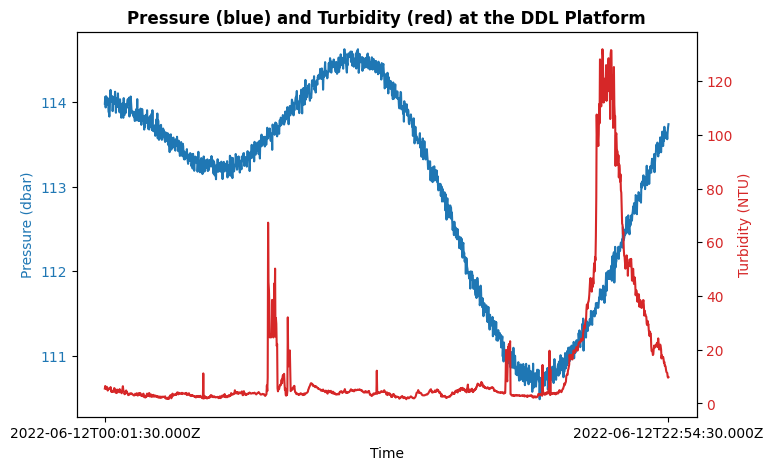

In [9]:
# Creating plot with extracted pressure data (dataset_1)
fig, ax1 = plt.subplots(figsize=(8, 5)) 

# Define the plot labels and properties 
color = 'tab:blue'
ax1.set_xlabel('Time') 
ax1.set_ylabel('Pressure (dbar)', color = color) 
ax1.plot(time_adcp,data_adcp, color = color) 
ax1.tick_params(axis ='y', labelcolor = color) 
ax1.set_xticks([time_adcp[1],time_adcp[-1]]) 


# Adding Twin Axes to plot using turbidity data (dataset_2)
# Plot the second dataset in the same figure
ax2 = ax1.twinx() 

# Define the plot labels and properties 
color = 'tab:red'
ax2.set_ylabel('Turbidity (NTU)', color = color) 
ax2.plot(time_turb,data_turb, color = color) 
ax2.tick_params(axis ='y', labelcolor = color) 
ax2.set_xticks([time_adcp[1],time_adcp[-1]]) 

# Add title to the plot
plt.title('Pressure (blue) and Turbidity (red) at the DDL Platform', fontweight ="bold") 

# Save the plot
fig.savefig('ADCPvTURB.png',dpi=300)

In the above plot, you can see the tidal cycle (blue) and turbidity (red) from 12 June 2022.  Notice how the turbidity increased suddenly at the end of the slack tide. These measurements were made at the seafloor, at a depth of 101 m. What was happening in the water column? We will look at this next.